## Answer for Question 1:
**a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

Firstly, take a look at the basic infomation of the data set.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [10]:
df.shape

(5000, 7)

We have 5000 rows and 7 columns in this data set. Now I know that the average order value (AOV) is calculated from column 'order_amount'. I want to know the summary statistics of 'order_amount' as the next step.

In [11]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Now it is clear that an AOV of $3145.13 is calculated as mean of all the data without any data analysis.
**Let's do some outlier detection.**

In [12]:
df['order_amount'].skew()

16.675033432503792

The skewness value of 16.675 shows that the variable 'order_amount' has a right-skewed distribution, indicating the presence of extreme higher values. The big gap between 'order_amount' value of 704000 and third quartile (Q3) value of 390 prove this point. I want to identify the data distribution with visualization as next step.

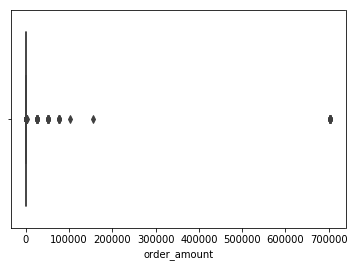

In [13]:
sns.boxplot('order_amount', data=df)

As shown in the above output, the variable 'order_amount' has an extreme outlier. I add showfliers argument as False in the function call in seaborn to suppress the plotting of outliers. 

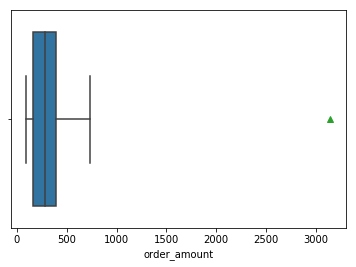

In [14]:
sns.boxplot('order_amount', data=df, showfliers=False, showmeans=True)

The boxplot after suppressing outliers gives me a better view. It is also straightforward to indicate an AOV of $3145.13 is unreasonable.
After I have identified the outliers, I need to treat them. What I want to use if IQR score. The rule is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed. 

In [15]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filtered_data = df[(df['order_amount'] >= Q1 - 1.5 * IQR) & (df['order_amount'] <= Q3 + 1.5 *IQR)]
filtered_data.order_amount.describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

As shown in statistics, I can use the mean value of 293.72 as the AOV. Hold on, since there are three types of payment methods, is that possible that the outliers only related to one type? If so, it is not quite wise to report AOV only. Let's see the distribution of order_amount of three different payment methods after removing outliers.

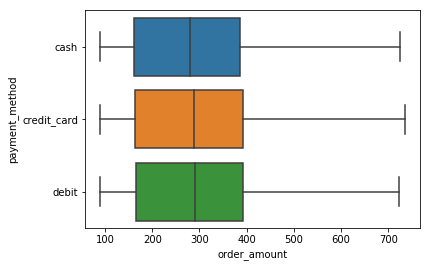

In [16]:
sns.boxplot(x='order_amount',y='payment_method', data=df, showfliers=False)

Now, I can use the AOV of value 293.72 as metric to report for this dataset.

**b. What metric would you report for this dataset?**

    Mean value after cleaning up outliers useing the IQR scores.

**c. What is its value?**

    293.72

## Answer for Question 2:
**a. How many orders were shipped by Speedy Express in total?**

Answer: 
54

In [17]:
SELECT COUNT(*) 
FROM Orders, Shippers 
WHERE Orders.ShipperId = Shippers.ShipperId AND ShipperName = "Speedy Express";

SyntaxError: invalid syntax (<ipython-input-17-02976ce8ec99>, line 1)

**b. What is the last name of the employee with the most orders?**

Answer: 
Peacock with 40 orders.

In [ ]:
SELECT Employees.LastName, COUNT(*) AS NumberOfOrders
FROM Orders
JOIN Employees
ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY NumberOfOrders DESC
LIMIT 1

**c. What product was ordered the most by customers in Germany?**

Answer: 
Boston Crab Meat with 160 orders.

In [ ]:
SELECT Products.ProductName,
    SUM(OrderDetails.Quantity) AS "Total"
FROM Orders
JOIN Customers
    ON Customers.CustomerID = Orders.CustomerID
JOIN OrderDetails
    ON OrderDetails.OrderID = Orders.OrderID
JOIN Products
    ON Products.ProductID = OrderDetails.ProductID
WHERE Customers.Country = 'Germany'
GROUP BY OrderDetails.ProductID
ORDER BY Total DESC
LIMIT 1;